In [1]:
import numpy as np
from scipy.integrate import simps
from scipy.integrate import quad
import pandas as pd 
#import del_m_fisher_bias_full as m  # CHECK WHICH D0,D1 IS USED
import numpy as np
#import fisher_ayan_function as f
#import dmdtheta_ayan_function as dm
#import fisher_ayan_function_LSST as f
#import fisher_ayan_function_LSST_CMBPrior as f
import sys
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Ellipse
import matplotlib as mpl
import matplotlib.pyplot as plt
#import Fisher_Ellipse_LSST_CMBPrior as F
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from copy import copy

In [3]:
b = pd.read_csv('Catastrophic_tzpz_WFIRST.csv',sep=' ' )

In [ ]:
'''
b.outlier_bias[0] = 0.00#0.006

#b.outlier_bias[1] = 0.00

b.F[2] = 0.01

b.F[3] = 0.01

b.F[4] = 0.01

'''

In [4]:
b['bias']=b.F
b['z']=b.z_true

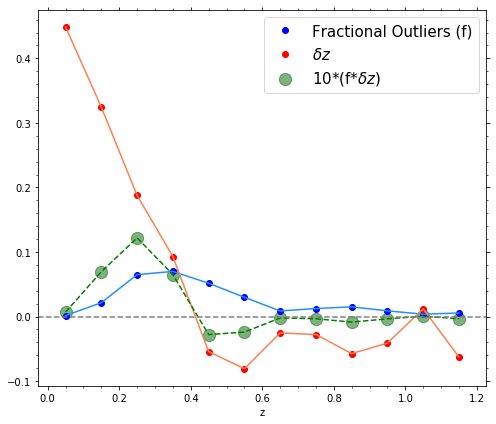

In [6]:
plt.rcParams['figure.figsize'] = [7,6] 
fig, axes = plt.subplots()
plt.plot(b.z,b.bias,'o',c='b',label='Fractional Outliers (f)')
plt.plot(b.z,b.bias,c='dodgerblue')
plt.plot(b.z,b.outlier_bias,'o',c='r',label='$\delta z$')
plt.plot(b.z,b.outlier_bias,c='coral')
plt.scatter(b.z,10*b.bias*b.outlier_bias,edgecolors='darkgreen',facecolors='darkgreen',
            label='10*(f*$\delta z$)',s=150,alpha=0.5)
plt.plot(b.z,10*b.bias*b.outlier_bias,linestyle='--',c='g',label='_nolegend_')
plt.xlabel('z')
plt.axhline(0,linestyle='--',color='grey')
#plt.vlines(0.4,-0.15,0,linestyle='--',color='grey',alpha=0.3)
#plt.vlines(0.62,-0.15,0,linestyle='--',color='grey',alpha=0.3)
#plt.ylabel('F,  Catastrophic Outliers Bias' )
plt.legend(fontsize=15)
axes.yaxis.set_ticks_position('both')
axes.xaxis.set_ticks_position('both')
axes.minorticks_on()
plt.tight_layout()
plt.savefig('f_dz_Corout_12_WFIRST.pdf',bbox_inches='tight')

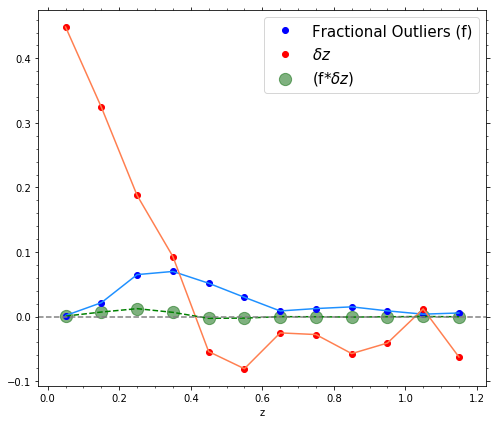

In [7]:
plt.rcParams['figure.figsize'] = [7,6] 
fig, axes = plt.subplots()
plt.plot(b.z,b.bias,'o',c='b',label='Fractional Outliers (f)')
plt.plot(b.z,b.bias,c='dodgerblue')
plt.plot(b.z,b.outlier_bias,'o',c='r',label='$\delta z$')
plt.plot(b.z,b.outlier_bias,c='coral')
plt.scatter(b.z,1*b.bias*b.outlier_bias,edgecolors='darkgreen',facecolors='darkgreen',
            label='(f*$\delta z$)',s=150,alpha=0.5)
plt.plot(b.z,1*b.bias*b.outlier_bias,linestyle='--',c='g',label='_nolegend_')
plt.xlabel('z')
plt.axhline(0,linestyle='--',color='grey')
#plt.vlines(0.4,-0.15,0,linestyle='--',color='grey',alpha=0.3)
#plt.vlines(0.62,-0.15,0,linestyle='--',color='grey',alpha=0.3)
#plt.ylabel('F,  Catastrophic Outliers Bias' )
plt.legend(fontsize=15)
axes.yaxis.set_ticks_position('both')
axes.xaxis.set_ticks_position('both')
axes.minorticks_on()
plt.tight_layout()
plt.savefig('f_dz_Corout_12bins_b_Wfirst.pdf',bbox_inches='tight')

In [8]:
Om = 0.3  # Omega Matter
Omatter = (1-Om)
w0 = -1
wa = 0
#w0 = -1.2;wa = -0.9;
#w0 = -0.8;wa = 0.9;
#a = (1+z)**(-1)
# 1
print ('w0, wa used : ', w0, wa)
# Not Required
#---------------------------------

def X(z):
    a = (1+z)**(-1)
    return Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))


def dxdm(z, wa, w0):
    a = (1+z)**(-1)
    zt = (1+z)
    w = (wa+w0)
    X3 = np.exp(3*wa*(a-1))
    X2 = zt**(3*w)
    X1 = X2*X3
    X4 = 1.-X1
    X = Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))
    A = (X**(-1.5))*X4*(zt**3)
    #A  = [1-zt**(-3*w)*np.exp(-3*wa*z/zt)]*zt**3
    return A

# 2


def dxdw0(z, wa, w0):
    a = (1+z)**(-1)
    zt = (1+z)
    ztt = z/zt  # z/1+z
    a_a = a**(3*wa)
    a_0 = a**(3*w0)
    e_a = np.exp(3*wa*(-ztt))
    A3 = (a_a**-1)*(-3*np.log(a)/a_0)
    A4 = e_a*A3
    X = Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))
    A = (X**(-1.5))*Omatter*zt**3*(A4)
    return A


# 3
def dxdwa(z, wa, w0):
    a = (1+z)**(-1)
    a2 = a-1
    zt = (1+z)
    ztt = z/zt
    a_a = a**(3*wa)
    a_0 = a**(3*w0)
    e_a = np.exp(3*wa*(-ztt))
    A3 = e_a*(-3*np.log(a)/a_a)
    A2 = 3*(a-1)*e_a/(a_a)
    A4 = A2+A3
    X = Om*(a**-3)+((1-Om)*a**(-3)*(a**(-3*(w0+wa))*np.exp(3*wa*(a-1))))
    A = (X**(-1.5))*(Omatter)*(zt**3)*(a_0**-1)*(A4)
    return A

# dxdM = 1 

# PRINTING CHECKS
#print 'Redshift  dx/dm      dx/dwo      dx/dwa'
#print '---------------------------------------'
# for i in (np.linspace(0.05,1.65,17)):
#          print("%.4f    %.4f    %.4f     %.4f " %(i,dxdm(i,0,-1),dxdw0(i,0,-1),dxdwa(i,0,-1)) )
# ************************************************************
# ************************************************************


# Integration Part : STARTS FROmatter BELOW

def H_0D_L(z):  # THIS WILL BE THEN INTEGRATED IN LINE NO. 106
    a = (1+z)**(-1)
    sec = (1-Om)*(a**-3)*(a**(-3*(w0+wa))*np.exp(3*(wa*(a-1))))
    fir = (Om*(a**-3))
    return((fir+sec)**(-0.5))


# ADDITIONAL FUNCTION DECLARATION
def fu1(z):
    return dxdm(z, wa, w0)


def fu2(z):
    return dxdw0(z, wa, w0)


def fu3(z):
    return dxdwa(z, wa, w0)

w0, wa used :  -1 0


In [9]:
# Z BINS
z = np.array(b.z)
#z = np.linspace(0.15,1.15,12)

# VARIABLE DECLARATION
I_om = []
I_wa = []
I_wo = []
hdl = []
prefactor1 = []
dx_domega = []
dx_dwa = []
dx_dw0 = []

# INTEGRATIONS RUNNING FROM LIMIT [0,Z_BIN[i]]
# THE fu FUNCTION CALLS THE OTHER FUNCTION : DX/DTHETA
# QUAD IS A PYTHON INTEGRATION FUNCTION WITH 3 ARGUMENTS :
# FUNCTION TO INTEGRATE, LOWER LIMIT, UPPER LIMIT

for ii in range(len(z[:])):
    I_om.append(quad(fu1, 0, z[ii])[0])
    I_wo.append(quad(fu2, 0, z[ii])[0])
    I_wa.append(quad(fu3, 0, z[ii])[0])
    hdl.append((1+z[ii])*quad(H_0D_L, 0, z[ii])[0])  # H0_Dl INTEGRATION
    # PREFACTOR WITHOUT THE H0_Dl TERM. THE 1* STANDS FOR 'c'
    prefactor1.append((-5/np.log(10))*(1*(1+z[ii]))/2)


# STORING THE VALUES IN ARRAYS
for i in range(len(I_om)):
    dx_domega.append((prefactor1[i]/hdl[i])*I_om[i])
    dx_dw0.append((prefactor1[i]/hdl[i])*I_wo[i])
    dx_dwa.append((prefactor1[i]/hdl[i])*I_wa[i])
    dx_dM = np.ones(17)
# WRITING TO A FILE
DXDT = pd.DataFrame(zip(z, dx_domega, dx_dw0, dx_dwa, dx_dM))
DXDT.columns = ['z', 'dmdom', 'dmdwo', 'dmdwa', 'dmdM']


def func():
    return DXDT

In [10]:
z

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15])

In [11]:
np.set_printoptions(precision=4)
# Produced by dmdtheta_ayan_function.py
P = DXDT #pd.read_csv('Fisher_Table_LSST.csv')
#P = pd.read_csv('Fisher_Table_LSST_old.csv')
dmdom = np.array(P['dmdom'])
dmdwo = np.array(P['dmdwo'])
dmdwa = np.array(P['dmdwa'])
dmdM = np.array(P['dmdM'])
z = np.array(P['z'])
dmdtheta = np.array(list(zip(dmdom, dmdwa, dmdwo, dmdM)))
N_parms = np.shape(dmdtheta)[1]

# ****LSST*****
s = 300*np.ones(np.shape(b)[0]-2)
s2 = np.array([150, 150])
s2 = np.ndarray.tolist(s2)
s = np.ndarray.tolist(s)
N = np.array(s+s2)
sigma_int_sq = 0.15*0.15
sigma_sys_sq = (0.01*(1+z))*(0.01*(1+z))
sigma_sq = sigma_int_sq/N + sigma_sys_sq
# ****LSST*****

F = np.zeros([N_parms, N_parms])
# since its scalar product, so order of the terms doesn't matter
dmdM_dmdM = (np.sum(np.multiply(np.multiply(dmdM, dmdM), (1/sigma_sq))))
dmdom_dmdom = (np.sum(np.multiply(np.multiply(dmdom, dmdom), (1/sigma_sq))))
dmdwa_dmdwa = (np.sum(np.multiply(np.multiply(dmdwa, dmdwa), (1/sigma_sq))))
dmdwo_dmdwo = (np.sum(np.multiply(np.multiply(dmdwo, dmdwo), (1/sigma_sq))))
dmdM_dmdom = (np.sum(np.multiply(np.multiply(dmdM, dmdom), (1/sigma_sq))))
dmdM_dmdwo = (np.sum(np.multiply(np.multiply(dmdM, dmdwo), (1/sigma_sq))))
dmdM_dmdwa = (np.sum(np.multiply(np.multiply(dmdM, dmdwa), (1/sigma_sq))))
dmdom_dmdwa = (np.sum(np.multiply(np.multiply(dmdom, dmdwa), (1/sigma_sq))))
dmdom_dmdwo = (np.sum(np.multiply(np.multiply(dmdom, dmdwo), (1/sigma_sq))))
dmdwa_dmdwo = (np.sum(np.multiply(np.multiply(dmdwa, dmdwo), (1/sigma_sq))))

F_I = np.array([dmdM_dmdM,  dmdM_dmdom,  dmdM_dmdwo,  dmdM_dmdwa, 
                dmdM_dmdom, dmdom_dmdom, dmdom_dmdwo, dmdom_dmdwa,
                dmdM_dmdwo, dmdom_dmdwo, dmdwo_dmdwo, dmdwa_dmdwo, 
                dmdM_dmdwa, dmdom_dmdwa, dmdwa_dmdwo, dmdwa_dmdwa])

Fisher_Matrix = F_I.reshape(4, 4)
Cov_Matrix = np.linalg.pinv(Fisher_Matrix)
C_ij = np.sqrt(np.diag(Cov_Matrix))

In [12]:
C_ij

array([0.0231, 0.2613, 0.1939, 3.395 ])

In [13]:
F_OmOm = 26282.777992634321
F_Omw0 = -7211.5106699248900
F_Omwa = -1974.3936330616734
F_w0w0 = 1978.7058337978979
F_w0wa = 541.73728345787083
F_wawa = 148.31880478414203
F1 = [F_OmOm, F_Omw0, F_Omwa, F_Omw0, F_w0w0, F_w0wa, F_Omwa, F_w0wa, F_wawa]
F1 = np.reshape(F1, (3, 3))
A1 = np.zeros(16)
A1 = np.reshape(A1, (4, 4))
for row in range(1, np.shape(A1)[0]):
    for col in range(1, np.shape(A1)[1]):
        A1[row][col] += F1[row-1][col-1]
F_Ext = A1 # CMB Matrix

In [14]:
Fisher_Matrix_PRIOR = Fisher_Matrix +  F_Ext # Adding Prior, you can add an additional matrix also, like Euclid
Cov_Matrix_PRIOR = np.linalg.pinv(Fisher_Matrix_PRIOR)
C_ij_PRIOR = np.sqrt(np.abs(np.diag(Cov_Matrix_PRIOR)))
#print np.matrix(F_I)

print('\n\n The ORDER IS : dM_dM, domega_m_domega_m, dw0_dw0, dwa_dwa]\n\n')
print ('\n\nFisher Matrix with prior \n', Fisher_Matrix_PRIOR)
#print '\n\n*****************************\n\n'
print ('Covariance Matrix with prior\n', Cov_Matrix_PRIOR)
#print '\n\n*****************************\n\n'
print ('sigma_ii with prior\n', C_ij_PRIOR)


def fisher_matrix():
    return Fisher_Matrix_PRIOR


def covariance_matrix():
    return Cov_Matrix_PRIOR



 The ORDER IS : dM_dM, domega_m_domega_m, dw0_dw0, dwa_dwa]




Fisher Matrix with prior 
 [[ 38595.474  -26024.6156 -10871.46    -1385.7381]
 [-26024.6156  50552.0336   2126.1211   -603.0763]
 [-10871.46     2126.1211   5684.2756   1060.9672]
 [ -1385.7381   -603.0763   1060.9672    226.6198]]
Covariance Matrix with prior
 [[ 3.0269e-04 -1.1137e-05  1.9272e-03 -7.2013e-03]
 [-1.1137e-05  6.8039e-05 -5.3767e-04  2.6302e-03]
 [ 1.9272e-03 -5.3767e-04  1.6886e-02 -6.8702e-02]
 [-7.2013e-03  2.6302e-03 -6.8702e-02  2.8902e-01]]
sigma_ii with prior
 [0.0174 0.0082 0.1299 0.5376]


In [15]:
#The Marginalized [2X2] subset of COVARIANCE Matrix.
# Here Marginalized over M, omega_m
# Obtained from : fisher_ayan_function_LSST_CMBPrior.py
#F = [0, -1,Cov_Matrix_PRIOR[3][3] ,Cov_Matrix_PRIOR[2][2] ,Cov_Matrix_PRIOR[3][2] ]
F = [0, -1,C_ij_PRIOR[3]**2 ,C_ij_PRIOR[2]**2 ,Cov_Matrix_PRIOR[3][2] ]
#F = [0, -1, 2.8902e-01, 1.6886e-02, -6.8702e-02]
# F = [wa,wo,wawa,wowo,wowa]  wa, w0, sigma_aa, sigma_00, sigma_a0
alpha = 1.52    # arxiv : 0906.4123. 1-s CL
print ('The Height and Width roughly is %.2f  %.2f' % (2*alpha*np.sqrt(F[2]), 2*alpha*np.sqrt(F[3])))

def a_square(sigma_x, sigma_y, sigma_xy):
    F = sigma_x + sigma_y
    G = (sigma_x - sigma_y)**2
    H = (G/4) + sigma_xy**2
    A = F/2 + np.sqrt(H)
    return A

def b_square(sigma_x, sigma_y, sigma_xy):
    F = sigma_x + sigma_y
    G = (sigma_x - sigma_y)**2
    H = (G/4) + sigma_xy**2
    B = F/2 - np.sqrt(H)
    return B

def tan_two_theta(sigma_x, sigma_y, sigma_xy):
    print ('theta :', -math.degrees(0.5*math.atan(2*sigma_xy/(sigma_x-sigma_y))))
    return(0.5*math.atan(2*sigma_xy/(sigma_x-sigma_y)))

def area(sigma_x, sigma_y, sigma_xy):
    return np.pi*(np.sqrt(a_square(sigma_x, sigma_y, sigma_xy))*alpha)*(np.sqrt(b_square(sigma_x, sigma_y, sigma_xy))*alpha)

def par(sigma_x, sigma_y, sigma_xy):
    a_star = np.sqrt(np.abs(a_square(sigma_x, sigma_y, sigma_xy)))*2*1.52
    b_star = np.sqrt(np.abs(b_square(sigma_x, sigma_y, sigma_xy)))*2*1.52
    two_theta = tan_two_theta(sigma_x, sigma_y, sigma_xy)
    param = [a_star, b_star, two_theta]
    return param

The Height and Width roughly is 1.63  0.40


In [16]:
from scipy.integrate import quad

# **************************
# This program returns the delta_m_k value
# **************************
# (5/ln10)*[delz(1/H*(1/int_0^z'delz/H ) + 1/(1+z))] !!NOT USED HERE!!
# w_a = 0, w_o = -1 , omega_m = 0.3
# H(z) = sqrt(omega_m*(1+z)^3 + (1-omega_m))

# D_L = (1+z) integration(dz/H(z))LIMIT:[0,z]

const = 5/np.log(10)


def H_z(z):
    omega_m = 0.3
    omega_de = 1-omega_m
    hz = omega_m*(1+z)**3+omega_de
    return np.sqrt(hz)


def H_z_inverse(z):
    return 1/(H_z(z))


#def del_z(d0, d1, z):
 #   return (d0+d1*z) # Dont need now

def integration_delz_h(z):
    I = quad(H_z_inverse, 0, z)[0]
    return I


def D_l(z):
    return (1+z)*integration_delz_h(z)


def del_m(i):
    #scale = b.bias[i]/1.0
    #bias = b.z_photo[i] - b.z[i]
    bias = b.outlier_bias[i]
    #x = const*np.log(D_l(z+b.bias[c])/D_l(z))
    x = const*np.log(D_l(z[i]+bias)/D_l(z[i]))
    return x


for i in (range(len(z))):
    del_m(i)

In [17]:
#z = np.linspace(0.05, 1.15, 12)
dm_dp = func()
sum = []
#do_d1 = np.array(b.bias) #[[0., 0.], [0.01, 0.], [0., 0.01]]
cs1 = []
for i in range(len(z)):
    #print i  
    #bias = b.z[i] - b.z_photo[i]
    bias = b.outlier_bias[i]
    x1 = b.bias[i]*(del_m(i)  + 1.4/(1+z[i])*(bias)) # <-- b.bias = frac outlier
    cs1.append(x1)    
print ('***********************\nFull expressions : No Approxiamtion')
print ('************************\n\ndel_m with IQR_ bias \n')
for i in range(len(cs1)):
    print("%.4f  " % (cs1[i]))
print ('***********************')
q = sigma_int_sq/N + sigma_sys_sq
print ('N            :  ', N)  # OK
print ('sigma_square :  ', sigma_sq)
value = '1'
flag = cs1
del_m_sigma_sq = flag/sigma_sq  # cs1 is used
cov = covariance_matrix()
XX_om = 0.
XX_wa = 0.
XX_w0 = 0.0
XX_M = 0.
for n in range(len(dm_dp)):
    XX_om += dm_dp['dmdom'][n]*del_m_sigma_sq[n]
    XX_w0 += dm_dp['dmdwo'][n]*del_m_sigma_sq[n]
    XX_wa += dm_dp['dmdwa'][n]*del_m_sigma_sq[n]
    XX_M += dm_dp['dmdM'][n] * del_m_sigma_sq[n]
arr = [XX_M, XX_om, XX_w0, XX_wa]
ide = 'new'
print ('\ncov : \n', cov)
print ('\ndel_m / sigma_sq\n', del_m_sigma_sq)
print ('array of 4 vectors\n %s' % arr)
del_p2 = cov.dot(arr)
print ('\ndel_p2 : \n', (del_p2))
name = 'del_p_LSST_New_%s.txt' % ide
#np.savetxt(name, np.matrix(del_p2), fmt='%.4f')

***********************
Full expressions : No Approxiamtion
************************

del_m with IQR_ bias 

0.0094  
0.0697  
0.1055  
0.0489  
-0.0198  
-0.0146  
-0.0011  
-0.0015  
-0.0035  
-0.0013  
0.0001  
-0.0011  
***********************
N            :   [300. 300. 300. 300. 300. 300. 300. 300. 300. 300. 150. 150.]
sigma_square :   [0.0002 0.0002 0.0002 0.0003 0.0003 0.0003 0.0003 0.0004 0.0004 0.0005
 0.0006 0.0006]

cov : 
 [[ 3.0269e-04 -1.1137e-05  1.9272e-03 -7.2013e-03]
 [-1.1137e-05  6.8039e-05 -5.3767e-04  2.6302e-03]
 [ 1.9272e-03 -5.3767e-04  1.6886e-02 -6.8702e-02]
 [-7.2013e-03  2.6302e-03 -6.8702e-02  2.8902e-01]]

del_m / sigma_sq
 [ 5.0652e+01  3.3619e+02  4.5618e+02  1.8996e+02 -6.9325e+01 -4.6156e+01
 -3.1474e+00 -3.9944e+00 -8.2801e+00 -2.8530e+00  2.4454e-01 -1.7188e+00]
array of 4 vectors
 [897.7534969643823, -263.1518706762121, -158.6016478198121, -8.194576426351933]

del_p2 : 
 [ 0.028   0.0358 -0.2436  1.3708]


In [18]:
x=[];y=[];
for i in range(0,12):
    scale = b.bias[i]/1.0 # frac outlier
    apply = i## which bin to apply with dz and omit the rest <<<<-----
    print ('****** z - Bin to work on : ', apply+1)
    counter = 0
    #z = np.linspace(0.05, 1.15, 12)
    dm_dp = func();sum = [];do_d1 = np.array(b.bias); 
    cs1 = [];cs5 = [];cs6 = [];
    cols = ['bias', 'bin_used', 'how']
    dat1 = pd.DataFrame(columns=cols)
    dat5 = pd.DataFrame(columns=cols)
    dat6 = pd.DataFrame(columns=cols)
#---------------------------------------------------------------
    for i in (range(len(z))): # apply on all bins
        #bias = b.z_photo[i] - b.z[i] 
        bias = b.outlier_bias[i]
        x1 = b.bias[i]*(del_m(i)  + 1.4/(1+z[i])*(bias))
        cs1.append(x1)
    dat1 = dat1.append({'bias': 'all_bias', 'bin_used': str(0), 'how': str(0)}, ignore_index=True)
#---------------------------------------------------------------
    counter = 0
    for i in (range(len(z))):  # APPLY ONLY ON ONE  BIN
        #bias = b.z_photo[i] - b.z[i]
        bias = b.outlier_bias[i]
        if apply == counter:
        #        print 'Condition match'
        #        print 'counter :',counter
        #        print 'apply :',apply
            x5 = b.bias[i]*(del_m(i)  + 1.4/(1+z[i])*(bias))  # 
            bias_flag = b.bias[i]
        else:
            x5 = 0.#np.zeros(1)#del_m(i, do_d1[0][0], do_d1[0][1])
        counter += 1
        cs5.append(x5)
    dat5 = dat5.append({'bias': str(bias_flag), 'bin_used': str(apply+1), 'how': str(1)}, ignore_index=True)
    counter = 0
#---------------------------------------------------------------
    for i in (range(len(z))):  # APPLY ON ALL BIN EXCEPT ONE
    #    print 'All Bin Except One : 6'
        #bias = b.z_photo[i] - b.z[i]
        bias = b.outlier_bias[i]
        if apply != counter:
            x6 = b.bias[i]*(del_m(i)  + 1.4/(1+z[i])*(bias))  # 
            bias_flag = b.bias[i]
        else:
            x6 = 0.
        counter += 1
        cs6.append(x6)
    dat6 = dat6.append({'bias': str(bias_flag), 'bin_used': str(apply+1), 'how': str(11)}, ignore_index=True)
    counter = 0
#---------------------------------------------------------------
    option = '2'# ******************     <<<<-----
    if option == '1': # all bin
        flag = cs1
        dat = dat1
    elif option == '2':  # only one bin 
        flag = cs5
        dat = dat5    
    elif option == '3':  # except one bin [0.01,0]
        flag = cs6
        dat = dat6        
#---------------------------------------------------------------  
#---------------------------------------------------------------
#---------------------------------------------------------------
# the first case, will be executed always as a baseline check
    del_m_sigma_sq = cs1/sigma_sq  # cs1 is used
    cov = covariance_matrix()
    XX_om = 0.
    XX_wa = 0.
    XX_w0 = 0.0
    XX_M = 0.
    for n in range(len(dm_dp)):
        XX_om += dm_dp['dmdom'][n]*del_m_sigma_sq[n]
        XX_w0 += dm_dp['dmdwo'][n]*del_m_sigma_sq[n]
        XX_wa += dm_dp['dmdwa'][n]*del_m_sigma_sq[n]
        XX_M += dm_dp['dmdM'][n] * del_m_sigma_sq[n]
    arr = [XX_M, XX_om, XX_w0, XX_wa]   
    del_p2_all = cov.dot(arr)
    columns = ['M', 'omegam', 'w0', 'wa']
    delt0 = pd.DataFrame(columns=columns)
    delt0 = delt0.append({'M': del_p2_all[0], 'omegam':  del_p2_all[1],
                        'w0':  del_p2_all[2], 'wa':  del_p2_all[3]}, ignore_index=True)
    data2 = pd.concat([delt0, dat1], axis=1) 
    y = np.append(y,del_p2_all)

#---------------------------------------------------------------
#---------------------------------------------------------------
#---------------------------------------------------------------

    del_m_sigma_sq = flag/sigma_sq  # cs1 is used
    cov = covariance_matrix()
    XX_om = 0.
    XX_wa = 0.
    XX_w0 = 0.0
    XX_M = 0.
    for n in range(len(dm_dp)):
        XX_om += dm_dp['dmdom'][n]*del_m_sigma_sq[n]
        XX_w0 += dm_dp['dmdwo'][n]*del_m_sigma_sq[n]
        XX_wa += dm_dp['dmdwa'][n]*del_m_sigma_sq[n]
        XX_M += dm_dp['dmdM'][n] * del_m_sigma_sq[n]
    arr = [XX_M, XX_om, XX_w0, XX_wa]  
#--------------------------------------------------------------- 
    del_p2 = cov.dot(arr)
    columns = ['M', 'omegam', 'w0', 'wa']
    delt = pd.DataFrame(columns=columns)
    delt = delt.append({'M': del_p2[0], 'omegam':  del_p2[1],
                        'w0':  del_p2[2], 'wa':  del_p2[3]}, ignore_index=True)
    data2 = pd.concat([delt, dat], axis=1)
    name = 'del_p_LSST_CMBPrior_Stretch_%s.txt' % ide
    name2 = 'del_p_LSST_CMBPrior_Stretch_LONG_%s.txt' % ide
    np.savetxt(name, np.matrix(del_p2), fmt='%.4f')
    #data2.to_csv(name2, index=False)
    print(del_p2)        
    x = np.append(x,del_p2)
x = np.append(y[0:4],x)    
x = np.reshape(x,(-1,4))   
column = ['del_M','del_om','del_w0','del_wa']
x = pd.DataFrame(x,columns=column)  # the first line contain the all bin result

****** z - Bin to work on :  1
[ 0.0104  0.0005  0.0565 -0.1998]
****** z - Bin to work on :  2
[0.0235 0.0114 0.0101 0.1171]
****** z - Bin to work on :  3
[-0.0036  0.0183 -0.2428  1.1329]
****** z - Bin to work on :  4
[-0.0087  0.0066 -0.1416  0.6058]
****** z - Bin to work on :  5
[ 0.004  -0.0016  0.0508 -0.2066]
****** z - Bin to work on :  6
[ 0.0025 -0.0003  0.0268 -0.1022]
****** z - Bin to work on :  7
[ 1.2173e-04  3.2235e-05  1.0993e-03 -3.5682e-03]
****** z - Bin to work on :  8
[7.2282e-05 1.1192e-04 3.0595e-04 3.9365e-04]
****** z - Bin to work on :  9
[-4.4236e-05  3.7556e-04 -1.7498e-03  1.1418e-02]
****** z - Bin to work on :  10
[-8.4849e-05  1.7631e-04 -1.4219e-03  7.5396e-03]
****** z - Bin to work on :  11
[ 1.3182e-05 -1.8854e-05  1.8948e-04 -9.4180e-04]
****** z - Bin to work on :  12
[-0.0001  0.0002 -0.0018  0.0086]


theta : 13.394896342242246
Width :  0.06968165498450374
Height : 1.67994762330455
Angle : 13.394896342242246


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


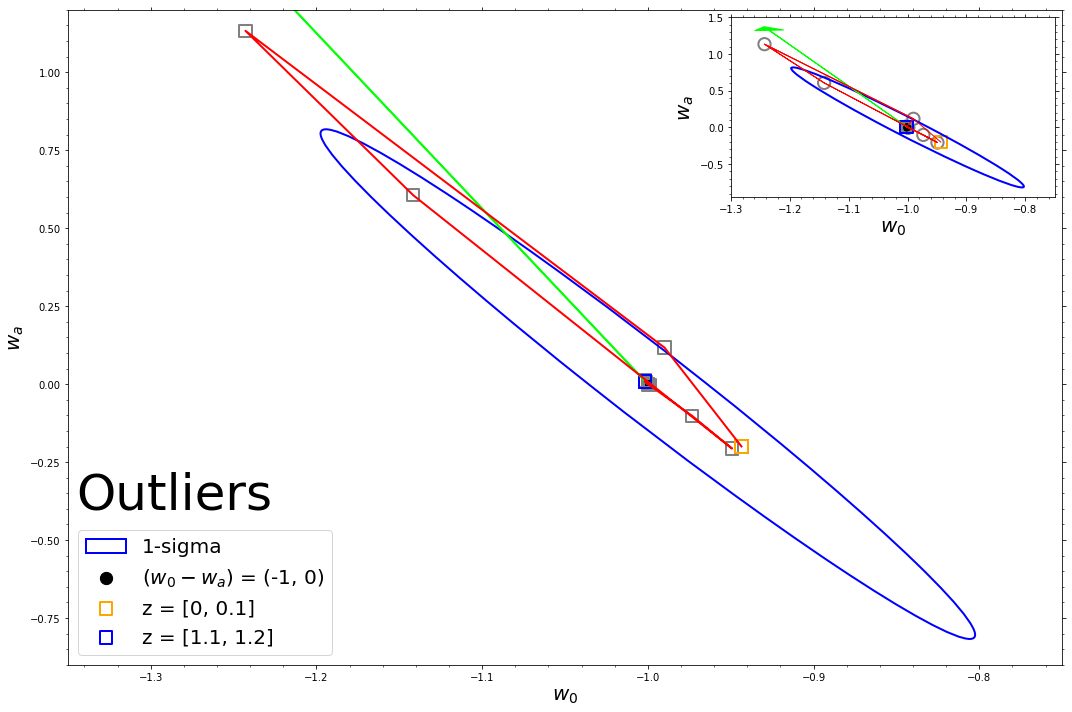

In [32]:
plt.rcParams['figure.figsize'] = [15,10] 
alpha = 1.52

params = par(F[2], F[3], F[4])
print ('Width : ', params[1])
print ('Height :', params[0])
print ('Angle :', -math.degrees(params[2]))



ell = mpl.patches.Ellipse(xy=[-1, 0], width=params[1], height=params[0], angle=-math.degrees(params[2]), facecolor='none', edgecolor='b', linewidth=2, label='1-sigma')
ell2 = copy(ell)
#ell = mpl.patches.Ellipse(xy=[-1, 0], width= 0.0696, height=1.679, angle=13.3949, facecolor='none', edgecolor='b', label='1-sigma')

fig, ax = plt.subplots()
ax.add_patch(ell)
ax.set_aspect('auto')
ax.set_facecolor('none')
ax.autoscale()  # ''tight
ax.scatter(F[1], F[0], c='black', marker='o',s=150, label='($w_0-w_a$) = (-1, 0)')
ax.set_xlabel(r'$w_0$',fontsize=20)
ax.set_ylabel(r'$w_a$',fontsize=20)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_xlim(-1.35, -0.75)
ax.set_ylim(-0.9, 1.2)
#ax.set_xlim(-1.85, -0.75)
#ax.set_ylim(-0.9, 3.9)
ax.minorticks_on()
r = x.iloc[1:,:] # after first line
del_w0_1_all = x['del_w0'].iloc[0]    
del_wa_1_all = x['del_wa'].iloc[0] 

colors = ["red", "grey" , "grey", "grey", "grey","grey",'grey',"grey","grey","grey","grey","blue"]
del_w0_1 = r['del_w0']  
del_wa_1 = r['del_wa']  
x4 = [];y4=[];
for i in range(12):
    xxx = (del_w0_1.iloc[i]-1);yyy = del_wa_1.iloc[i] 
    x4.append(xxx);y4.append(yyy)
    plt.scatter(xxx,yyy,marker='s',facecolors='none',edgecolors=colors[i],s=150,linewidth=2)#label='%s'%(i+1)
    #rect = mpl.patches.Rectangle((xxx,yyy),.02,.06,linewidth=1,edgecolor='r',facecolor='none')
    #ax.add_patch(rect)
plt.plot(x4,y4,c='red',linewidth=2) 
plt.scatter(del_w0_1.iloc[0]-1, del_wa_1.iloc[0],marker='s',s=150,linewidth=2,edgecolors='orange',facecolors='none',label = 'z = [0, 0.1]' )
plt.scatter(del_w0_1.iloc[-1]-1, del_wa_1.iloc[-1],marker='s',s=150,linewidth=2,edgecolors='b',facecolors='none',label = 'z = [1.1, 1.2]' )
#a_all = plt.arrow(-1, 0, del_w0_1_all, del_wa_1_all, head_width=0.05, head_length=0.1,length_includes_head=True, color='lime')
a_all = plt.arrow(-1, 0, del_w0_1_all, del_wa_1_all, head_width=0.01, head_length=0.01,length_includes_head=True, color='lime')

plt.text(-1.345, -0.4, 'Outliers', size=50)

plt.legend(loc = 'lower left',prop={'size': 20})

#------------------- Inset plot

left, bottom, width, height = [0.68, 0.72, 0.3, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.add_patch(ell2)
ax2.set_aspect('auto')
ax2.set_facecolor('none')
ax2.autoscale()  # ''tight
ax2.scatter(F[1], F[0], c='black', marker='o',s=150, label='($w_0-w_a$) = (-1, 0)')
ax2.set_xlabel(r'$w_0$',fontsize=20)
ax2.set_ylabel(r'$w_a$',fontsize=20)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.set_xlim(-1.3, -0.75)
ax2.set_ylim(-0.95, 1.5)
ax2.minorticks_on()
for i in range(1,11):
    xxx = (del_w0_1.iloc[i]-1);yyy = del_wa_1.iloc[i] 
    x4.append(xxx);y4.append(yyy)
    #print('no = %s, x=%s, y=%s'%(i,xxx,yyy))
    plt.scatter(xxx,yyy,marker='o',facecolors='none',label='%s'%(i+1),edgecolors=colors[i],s=150,linewidth=2)#label='%s'%(i+1)
    #rect = mpl.patches.Rectangle((xxx,yyy),.02,.06,linewidth=1,edgecolor='r',facecolor='none')
    #ax.add_patch(rect)
#plt.scatter((del_w0_1.iloc[9]-1),del_wa_1.iloc[9],'.')    
plt.plot(x4,y4,c='red',linewidth=1) 
plt.scatter(del_w0_1.iloc[0]-1, del_wa_1.iloc[0],marker='s',s=150,linewidth=2,edgecolors='orange',facecolors='none',label = 'z = [0, 0.1]' )
plt.scatter(del_w0_1.iloc[-1]-1, del_wa_1.iloc[-1],marker='s',s=150,linewidth=2,edgecolors='b',facecolors='none',label = 'z = [1.1, 1.2]' )
a_all = plt.arrow(-1, 0, del_w0_1_all, del_wa_1_all, head_width=0.05, head_length=0.05,length_includes_head=True, color='lime')



#plt.legend(loc = 'lower left')
plt.tight_layout()
#plt.savefig('Catastrophic_Bin_12_WFIRST.pdf',bbox_inches='tight')
#plt.close()

In [20]:
# this values are assigned to arN(x,y) below. For each bias bin the corresponding Nth x,y are assigned
del_w0_1_all, del_wa_1_all

(-0.24355106126735404, 1.370778604701603)

In [ ]:
# This set for bias = F or Catastrophic outlier bias
#ar5x, ar5y = 0.1286822647015251, -0.4302653358331021
#ar4x, ar4y = 0.17705970001653504, -0.6553441332837409
#ar3x, ar3y = 0.2676164233316015, -1.0235980166395136
#ar2x, ar2y = 0.16598550074880214, -0.5887044132482311
ar1x, ar1y = 0.011804452716370366, 0.018867407982281426
ar0x, ar0y = 0.0186335097797711, 0.0984021126413272